### Handwritten digits classification using neural network
In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

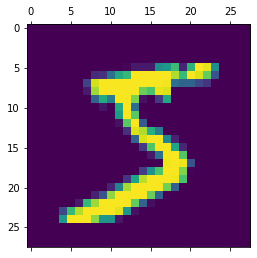

In [7]:
plt.matshow(X_train[0])

In [8]:
y_train[0]

5

In [9]:
X_train = X_train / 255
X_test = X_test / 255

In [10]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [12]:
X_train_flattened.shape

(60000, 784)

In [13]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [15]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4907 - accuracy: 0.8767
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3064 - accuracy: 0.9162
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2857 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2749 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2679 - accuracy: 0.9261


In [16]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.2694 - accuracy: 0.9258


[0.269386351108551, 0.9258000254631042]

In [17]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([1.8979115e-05, 1.3544985e-10, 4.5575187e-05, 9.4366670e-03,
       9.9550482e-07, 1.0640082e-04, 1.8196488e-09, 7.3348653e-01,
       7.9148609e-05, 9.3719363e-04], dtype=float32)

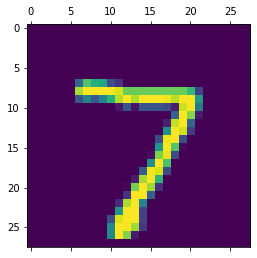

In [18]:
plt.matshow(X_test[0])

In [19]:
np.argmax(y_predicted[0])

7

In [20]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [21]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [22]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    1,    2,    0,    6,    9,    2,    1,    0],
       [   0, 1116,    3,    2,    0,    1,    4,    2,    7,    0],
       [   5,    9,  930,   13,    7,    6,   15,   11,   34,    2],
       [   4,    0,   18,  915,    1,   35,    3,   11,   16,    7],
       [   1,    2,    2,    1,  922,    0,   14,    4,    7,   29],
       [   7,    2,    2,   25,   10,  794,   19,    4,   24,    5],
       [   6,    3,    3,    1,    7,   13,  923,    1,    1,    0],
       [   1,    6,   24,    6,    9,    1,    0,  949,    1,   31],
       [   7,   10,    6,   26,   10,   42,   10,   13,  844,    6],
       [  11,    7,    1,   10,   34,   10,    0,   25,    5,  906]])>

Text(69.0, 0.5, 'Truth')

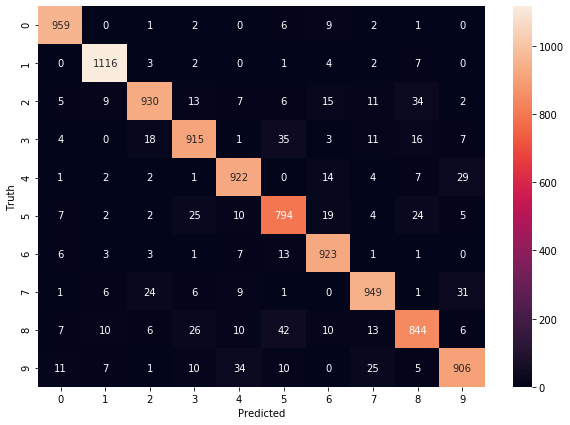

In [23]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [25]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3013 - accuracy: 0.9153
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1379 - accuracy: 0.9599
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0952 - accuracy: 0.9719
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0734 - accuracy: 0.9776
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0589 - accuracy: 0.9819


313/313 [==============================] - 0s 1ms/step - loss: 0.0784 - accuracy: 0.9755


Text(69.0, 0.5, 'Truth')

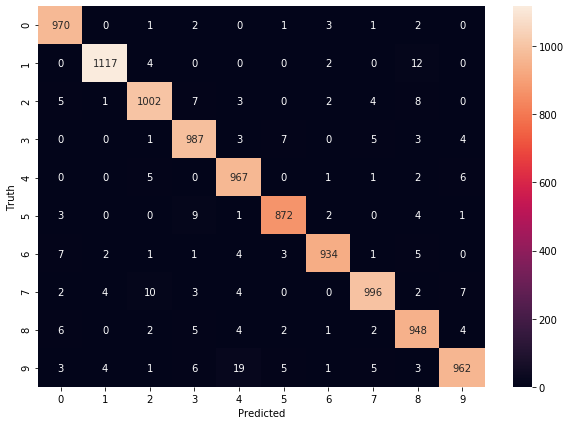

In [26]:
model.evaluate(X_test_flattened,y_test)
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [27]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2856 - accuracy: 0.9207
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1251 - accuracy: 0.9635
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0895 - accuracy: 0.9741
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0698 - accuracy: 0.9788
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0567 - accuracy: 0.9832
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0474 - accuracy: 0.9853
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0391 - accuracy: 0.9879
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0324 - accuracy: 0.9903
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0280 - accuracy: 0.9913
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.023

In [28]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0802 - accuracy: 0.9767


[0.08020375669002533, 0.9767000079154968]